In [87]:
import os
# os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'

In [88]:
import tensorflow as tf

In [89]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [90]:
import tensorflow as tf
import numpy as np
import os
import tensorflow as tf
import shutil
import random
import cv2
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.applications.vgg16 import preprocess_input, VGG16
from keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras_applications.imagenet_utils import _obtain_input_shape
from keras import backend as K
from keras.layers import Input, Convolution2D, MaxPooling2D, Activation, concatenate, Dropout
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.python.keras.utils.data_utils import get_file

from tensorflow.keras.utils import get_source_inputs
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [91]:
from keras.applications.inception_resnet_v2 import preprocess_input, InceptionResNetV2

In [92]:
data_path = "dataset/Skenario 5/training"


In [93]:

# path to destination folders
train_folder = os.path.join('dataset/Skenario_8/', 'training')
validation_folder = os.path.join('dataset/Skenario_8/', 'validation')

In [94]:
image_extensions = ['.jpg', '.jpeg', '.png', '.bmp']

In [95]:
os.listdir(train_folder)

['pins_barack obama',
 'pins_Brie Larson',
 'pins_Johnny Depp',
 'pins_Natalie Portman',
 'pins_Rami Malek']

In [96]:
train = ImageDataGenerator(rescale=1/255)
validate = ImageDataGenerator(rescale=1/255)

In [97]:
train_gen = train.flow_from_directory(train_folder, 
                                      target_size = (128,128), 
                                      batch_size = 3)
validate_gen = validate.flow_from_directory(validation_folder, 
                                            target_size = (128,128), 
                                            batch_size = 3)

Found 630 images belonging to 5 classes.
Found 161 images belonging to 5 classes.


In [98]:
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(128,128,3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(train_gen.num_classes, activation='softmax')(x) 

model = Model(inputs=base_model.input, outputs=x)

In [99]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1015 (Conv2D)           (None, 63, 63, 32)   864         ['input_6[0][0]']                
                                                                                                  
 batch_normalization_1015 (Batc  (None, 63, 63, 32)  96          ['conv2d_1015[0][0]']            
 hNormalization)                                                                                  
                                                                                            

In [100]:
# model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(128,128,3))
# model = Model(inputs=model.input, outputs=model.layers[-5].output)
# base_out = model.output
# base_out = Flatten()(base_out)
# base_out = Dense(train_gen.num_classes, activation='softmax')(base_out)
# model = Model(inputs=model.input, outputs=base_out)
# model.summary()

In [101]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [102]:
saveBestSqueezeNetAccuracy= tf.keras.callbacks.ModelCheckpoint('best_model_inceptionressnet_accuracy.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

In [85]:
saveBestSqueezeNet= tf.keras.callbacks.ModelCheckpoint('best_model_inceptionressnet_val_loss.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

In [103]:
history = model.fit(train_gen,
                    epochs=50,
                    validation_data=validate_gen,
                    callbacks=[saveBestSqueezeNet,saveBestSqueezeNetAccuracy]
                    )

Epoch 1/50
210/210 [==============================] - ETA: 0s - loss: 1.2131 - accuracy: 0.5333
Epoch 1: val_loss improved from 289.92145 to 6.18166, saving model to best_model_inceptionressnet_val_loss.h5

Epoch 1: val_accuracy improved from -inf to 0.57143, saving model to best_model_inceptionressnet_accuracy.h5
210/210 [==============================] - 81s 287ms/step - loss: 1.2131 - accuracy: 0.5333 - val_loss: 6.1817 - val_accuracy: 0.5714
Epoch 2/50
210/210 [==============================] - ETA: 0s - loss: 0.6752 - accuracy: 0.7698
Epoch 2: val_loss did not improve from 6.18166

Epoch 2: val_accuracy improved from 0.57143 to 0.77640, saving model to best_model_inceptionressnet_accuracy.h5
210/210 [==============================] - 58s 274ms/step - loss: 0.6752 - accuracy: 0.7698 - val_loss: 3845.8369 - val_accuracy: 0.7764
Epoch 3/50
210/210 [==============================] - ETA: 0s - loss: 0.4404 - accuracy: 0.8571
Epoch 3: val_loss did not improve from 6.18166

Epoch 3: val_

In [104]:
history

Mean Validation Accuracy (Epoch 50):  0.9024844753742218
Mean Validation Loss (Epoch 50):  599.6155536872149


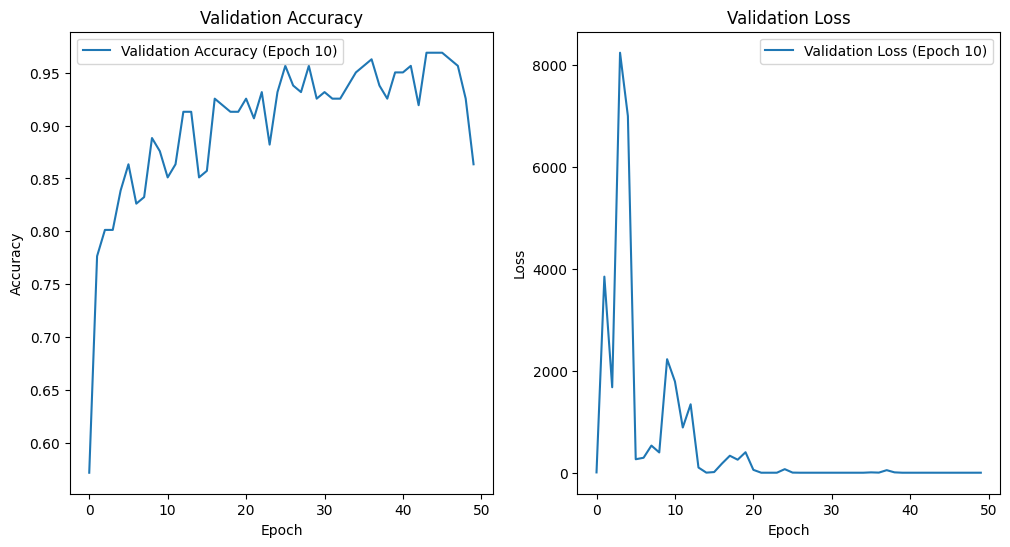

In [105]:
val_accuracy1 = history.history['val_accuracy']
val_loss1 = history.history['val_loss']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(val_accuracy1, label='Validation Accuracy (Epoch 10)')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_loss1, label='Validation Loss (Epoch 10)')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print("Mean Validation Accuracy (Epoch 50): ", np.mean(val_accuracy1))
print("Mean Validation Loss (Epoch 50): ", np.mean(val_loss1))

In [112]:
best_model_biasa = tf.keras.models.load_model("best_model_inceptionressnet_val_loss.h5")


In [118]:
best_model_biasa_2 = tf.keras.models.load_model("best_model_inceptionressnet_accuracy.h5")

In [123]:
#save model
model.save("model_inceptionressnet_50epoch.h5")

In [113]:
train_gen.class_indices

{'pins_Brie Larson': 0,
 'pins_Johnny Depp': 1,
 'pins_Natalie Portman': 2,
 'pins_Rami Malek': 3,
 'pins_barack obama': 4}

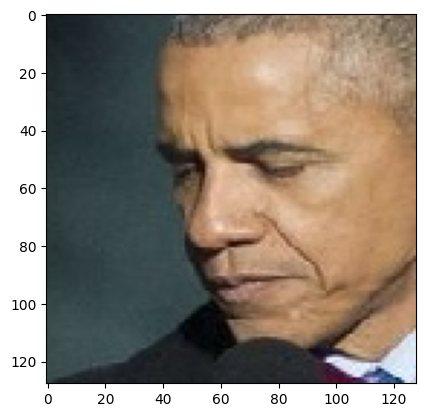

1/1 [==============================] - 0s 62ms/step
Model 1 :  ['pins_barack obama']
Model 2 :  [4]


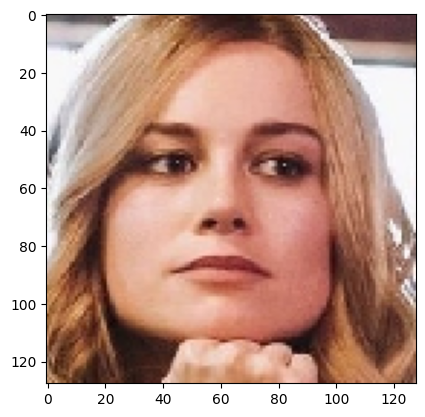

1/1 [==============================] - 0s 70ms/step
Model 1 :  ['pins_Brie Larson']
Model 2 :  [0]


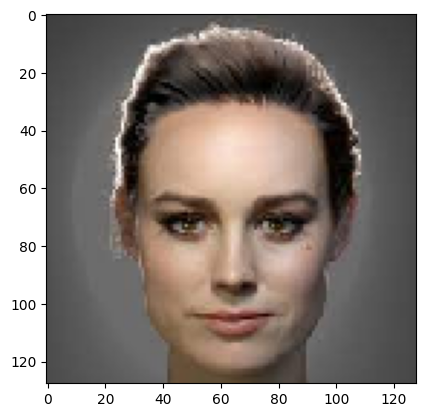

1/1 [==============================] - 0s 56ms/step
Model 1 :  ['pins_barack obama']
Model 2 :  [4]


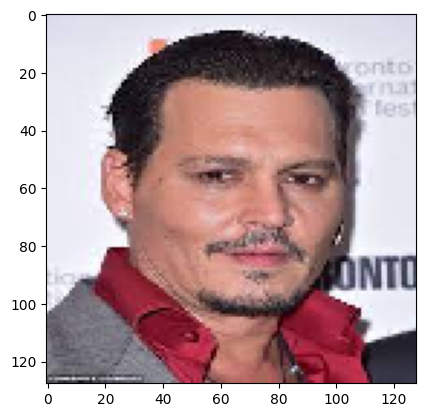

1/1 [==============================] - 0s 58ms/step
Model 1 :  ['pins_barack obama']
Model 2 :  [4]


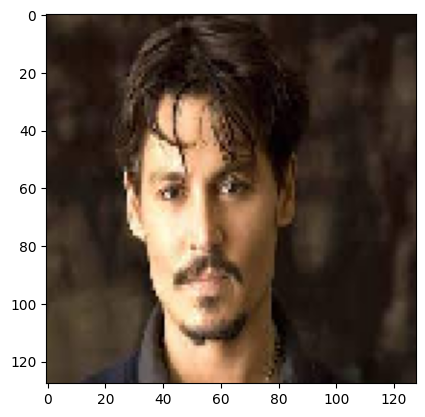

1/1 [==============================] - 0s 55ms/step
Model 1 :  ['pins_Rami Malek']
Model 2 :  [3]


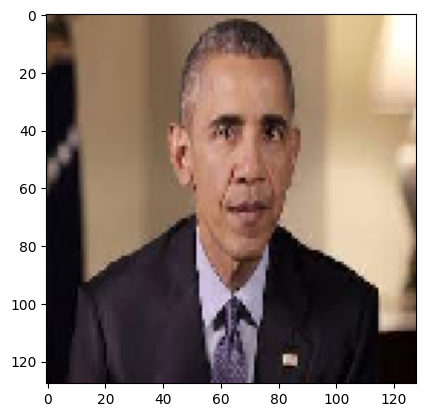

1/1 [==============================] - 0s 56ms/step
Model 1 :  ['pins_barack obama']
Model 2 :  [4]


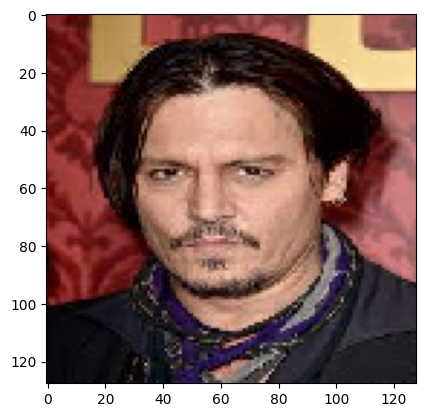

1/1 [==============================] - 0s 53ms/step
Model 1 :  ['pins_barack obama']
Model 2 :  [4]


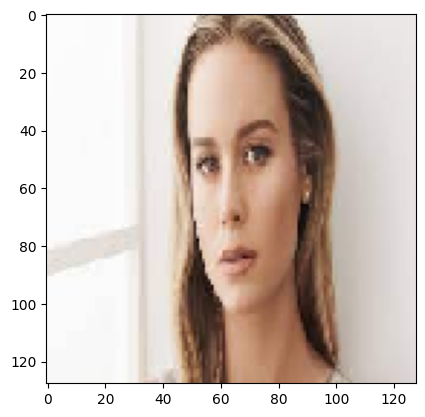

1/1 [==============================] - 0s 63ms/step
Model 1 :  ['pins_Brie Larson']
Model 2 :  [0]


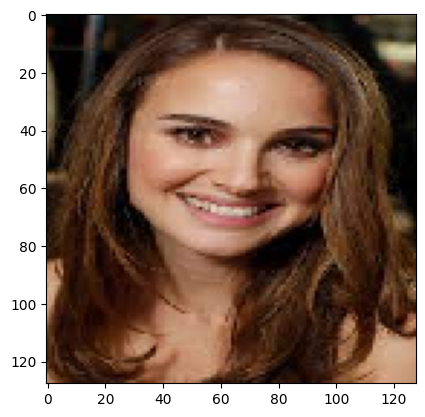

1/1 [==============================] - 0s 53ms/step
Model 1 :  ['pins_barack obama']
Model 2 :  [4]


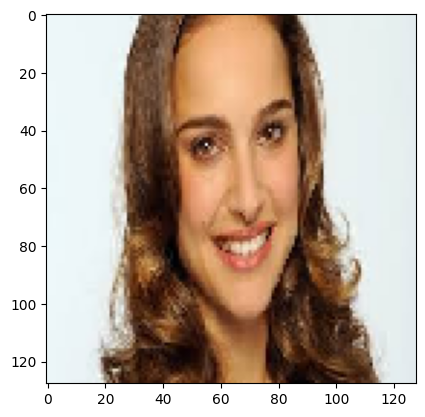

1/1 [==============================] - 0s 58ms/step
Model 1 :  ['pins_barack obama']
Model 2 :  [4]


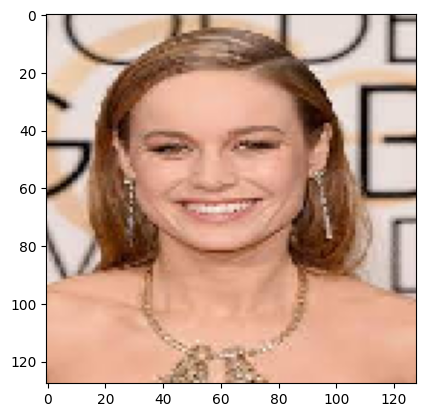

1/1 [==============================] - 0s 67ms/step
Model 1 :  ['pins_Brie Larson']
Model 2 :  [0]


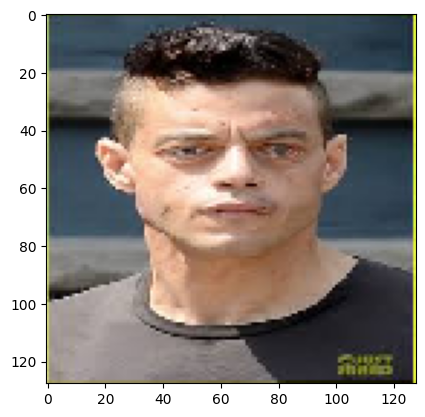

1/1 [==============================] - 0s 54ms/step
Model 1 :  ['pins_barack obama']
Model 2 :  [4]


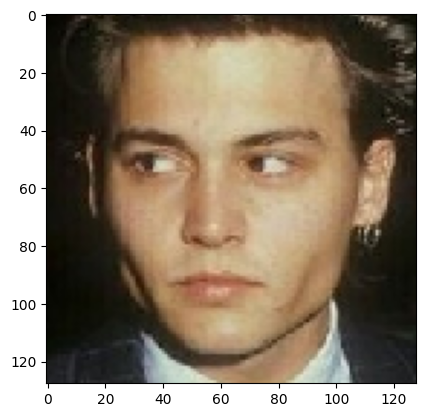

1/1 [==============================] - 0s 86ms/step
Model 1 :  ['pins_Johnny Depp']
Model 2 :  [1]


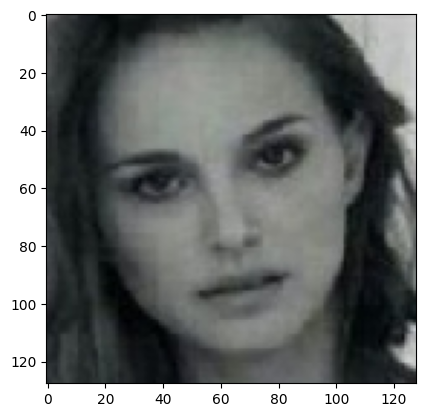

1/1 [==============================] - 0s 52ms/step
Model 1 :  ['pins_barack obama']
Model 2 :  [4]


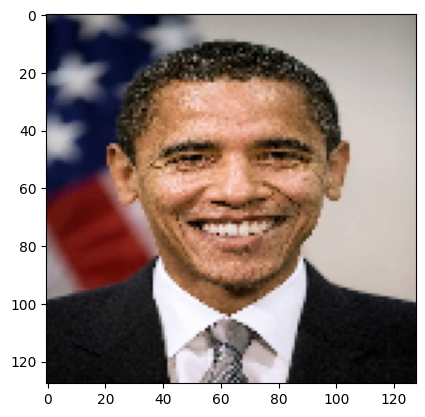

1/1 [==============================] - 0s 55ms/step
Model 1 :  ['pins_barack obama']
Model 2 :  [4]


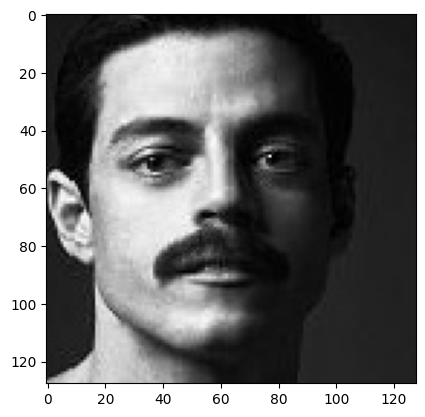

1/1 [==============================] - 0s 69ms/step
Model 1 :  ['pins_Rami Malek']
Model 2 :  [3]


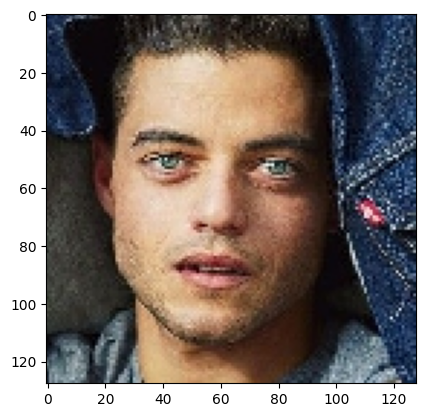

1/1 [==============================] - 0s 53ms/step
Model 1 :  ['pins_Rami Malek']
Model 2 :  [3]


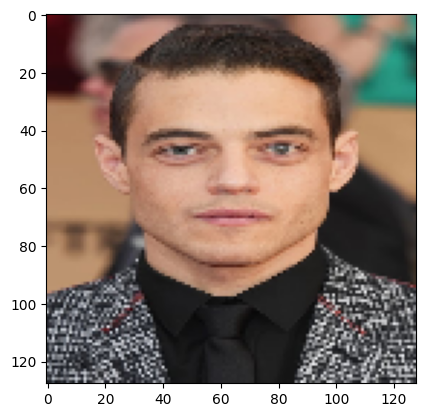

1/1 [==============================] - 0s 56ms/step
Model 1 :  ['pins_barack obama']
Model 2 :  [4]


In [130]:
test_dir = test_dir = os.path.join('dataset/skenario_8', 'testing')
for image in os.listdir(test_dir):
  image_path = os.path.join(test_dir, image)
  img = load_img(image_path, target_size=(128,128))
  plt.imshow(img)
  plt.show()

  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)


  pred1 = model.predict(x)

  predicted_class1 = np.argmax(pred1, axis=1)
  labels = (train_gen.class_indices)
  labels = dict((v,k) for k,v in labels.items())

  predictions = [labels[k] for k in predicted_class1]
  print('Model 1 : ', predictions)
  print('Model 2 : ', predicted_class1)